<div dir="rtl" align="center">
<font face="XB Zar" size=5>
    <font face="IranNastaliq" size=5>
      به نام خدا
    </font>
    <br>
    <font size=3>
      دانشگاه صنعتی شریف - دانشکده مهندسی کامپیوتر
    </font>
    <br>
    <font color=blue size=5>
      مقدمه‌ای بر یادگیری ماشین
    </font>
    <br>
    <hr/>
    <font color=red size=6>
      فصل چهارم: مدل‌های یادگیری ماشین برای داده‌های جدول
    </font>
    <br>
      نویسندگان:‌ امیدرضا حیدری
    <hr>
<br>
  <div align="right">
  <font color="red" size=5>فهرست مطالب</font>
	<ul>
    <li>
		  <a href="#dataset">
        آشنایی با دیتاست
        <ul>
          <li>
            <a href="#columns">
              آشنایی با ستون های دیتاست
            </a>
          </li>
          <li>
            <a href="#preprocessing">
              آماده سازی دیتاست برای پردازش
            </a>
          </li>
        </ul>
    </a>
		</li>
		<li>
      <a href="#intro">
        مقدمه ای بر روش های
        <font face="Roboto">Ensemble</font>
      </a>
    </li>
    <li>
      <a href="#voting">
        روش رأی‌ گیری
        <font face="Roboto">(Voting)</font>
      </a>
		</li>
    <li>
      <a href="#bagging">
        روش
        <font face="Roboto">Bagging</font>
      </a>
    </li>
    <li>
      <a href="#pasting">
        روش
        <font face="Roboto">Pasting</font>
      </a>
    </li>
    <li>
      <a href="#out-of-bag">
        ارزیابی
        <font face="Roboto">Out-of-Bag</font>
      </a>
    </li>
    <li>
      <a href="#random-forests">
        روش
        <font face="Roboto">Random Forests</font>
      </a>
    </li>
    <li>
      <a href="#extera-trees">
        روش
        <font face="Roboto">Extera-Trees</font>
      </a>
		</li>
    <li>
      <a href="#boosting">
        روش
        <font face="Roboto">Boosting</font>
      </a>
      <ul>
        <li>
          <a href="#adaboost">
            الگوریتم
            <font face="Roboto">AdaBoost</font>
          </a>
        </li>
        <li>
          <a href="#gradient-boosting">
            الگوریتم
            <font face="Roboto">Gradient Boosting</font>
          </a>
        </li>
        <li>
          <a href="#xg-boost">
            الگوریتم
            <font face="Roboto">XGBoost</font>
          </a>
        </li>
        <li>
          <a href="#early-stopping">
            استفاده از
            <font face="Roboto">Early stopping</font>
          </a>
        </li>
        <li>
          <a href="#cat-boost">
            الگوریتم
            <font face="Roboto">CatBoost</font>
          </a>
        </li>
      </ul>
    </li>
    <li>
      <a href="#stacking">
        روش                    
        <font face="Roboto">Stacking</font>
      </a>
    </li>
    </div>
</font>
</div>


  <div dir=rtl id="dataset">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        آشنایی با دیتاست
      </font>
      <hr />
      دیتاستی که در این قسمت از آن استفاده خواهد شد، دیتاست مربوط به یک کمپین بازاریابی یک بانک در کشور پرتقال است که در سایت
      <a href="https://www.kaggle.com/">
        <font face="Roboto">
          Kaggle
        </font>
      </a>
      منتشر شده است.
      همچنین از لینک زیر می توان به دیتاست مربوط دسترسی پیدا کرد:
      <br />
      <div dir=ltr>
        <a href="https://www.kaggle.com/datasets/krantiswalke/bankfullcsv">
          <font face="Roboto">
            https://www.kaggle.com/datasets/krantiswalke/bankfullcsv
          </font>
        </a>
      </div>
      </font>
    </div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/bank-full.csv")

Mounted at /content/gdrive



  <div dir=rtl id="columns">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        آشنایی با ستون های دیتاست
      </font>
      <hr />
      دیتاست شامل 17 ستون می شود:
      <ol>
        <li>
          <font face="Roboto">Age: </font>
          سن افراد
        </li>
        <li>
          <font face="Roboto">job: </font>
          نوع شغل افراد که شامل یکی از مقدار زیر است:
          <ul>
            <font face="Roboto">
              <li>
                admin.
              </li>
              <li>
                bluecollar
              </li>
              <li>
                entrepreneur
              </li>
              <li>
                housemaid
              </li>
              <li>
                management
              </li>
              <li>
                retired
              </li>
              <li>
                selfemployed
              </li>
              <li>
                services
              </li>
              <li>
                student
              </li>
              <li>
                technician
              </li>
              <li>
                unemployed
              </li>
              <li>
                unknown
              </li>
            </font>
          </ul>
        </li>
        <li>
          <font face="Roboto">marital: </font>
          وضعیت تاهل افراد که شامل یکی از مقدار زیر است:
          <ul>
            <font face="Roboto">
              <li>
                divorced
              </li>
              <li>
                married
              </li>
              <li>
                single
              </li>
              <li>
                unknown
              </li>
            </font>
          </ul>
        </li>
        <li>
          <font face="Roboto">education: </font>
          وضعیت تحصیلی افراد که شامل یکی از مقادیر زیر است:
          <ul>
            <font face="Roboto">
              <li>
                basic.4y
              </li>
              <li>
                basic.6y
              </li>
              <li>
                basic.9y
              </li>
              <li>
                high.school
              </li>
              <li>
                illiterate
              </li>
              <li>
                professional.course
              </li>
              <li>
                university.degree
              </li>
              <li>
                unknown
              </li>
            </font>
          </ul>
        </li>
        <li>
          <font face="Roboto">default: </font>
          به صورت پیشفرض کردیت دارد؟
        </li>
        <li>
          <font face="Roboto">balance: </font>
          میانگین موجودی سالانه(یورو)
        </li>
        <li>
          <font face="Roboto">housing: </font>
          وام مسکن دارد؟
        </li>
        <li>
          <font face="Roboto">contact: </font>
          روش ارتباط با مشتری که شامل یکی از موارد زیر است:
          <ul>
            <font face="Roboto">
              <li>
                cellular
              </li>
              <li>
                telephone
              </li>
            </font>
          </ul>
        </li>
        <li>
          <font face="Roboto">day: </font>
          روز آخرین ارتباط
        </li>
        <li>
          <font face="Roboto">month: </font>
          ماه آخرین ارتباط که شامل یکی از موارد زیر است:
          <ul>
            <font face="Roboto">
              <li>
                jan
              </li>
              <li>
                feb
              </li>
              <li>
                mar
              </li>
              <li>
                apr
              </li>
              <li>
                may
              </li>
              <li>
                jun
              </li>
              <li>
                jul
              </li>
              <li>
                aug
              </li>
              <li>
                sep
              </li>
              <li>
                oct
              </li>
              <li>
                nov
              </li>
              <li>
                dec
              </li>
            </font>
          </ul>
        </li>
        <li>
          <font face="Roboto">duration: </font>
          مدت زمان آخرین ارتباط که واحد آن ثانیه است
        </li>
        <li>
          <font face="Roboto">campaign: </font>
           تعداد ارتباط با مشتری برای این کمپین
        </li>
        <li>
          <font face="Roboto">pdays: </font>
          تعداد روزهای گذشته شده از آخرین کمپینی که مشتری در آن شرکت کرده است(اگر این فیلد 999 باشد به این معنی است که مشتری قبلا با هیچ کمپینی ارتباط نداشته است)
        </li>
        <li>
          <font face="Roboto">previous: </font>
          تعداد ارتباط با مشتری برای کمپین های قبلی
        </li>
        <li>
          <font face="Roboto">poutcome: </font>
          نتیجه کمپین قبل که یکی از موارد زیر است:
          <ul>
            <font face="Roboto">
              <li>
                failure
              </li>
              <li>
                nonexistent
              </li>
              <li>
                success
              </li>
            </font>
          </ul>
        </li>
        <li>
          <font face="Roboto">target: </font>
          آیا مشتری در کمپین فعلی عضو شد؟
        </li>
      </ol>
  </font>
  </div>

In [3]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


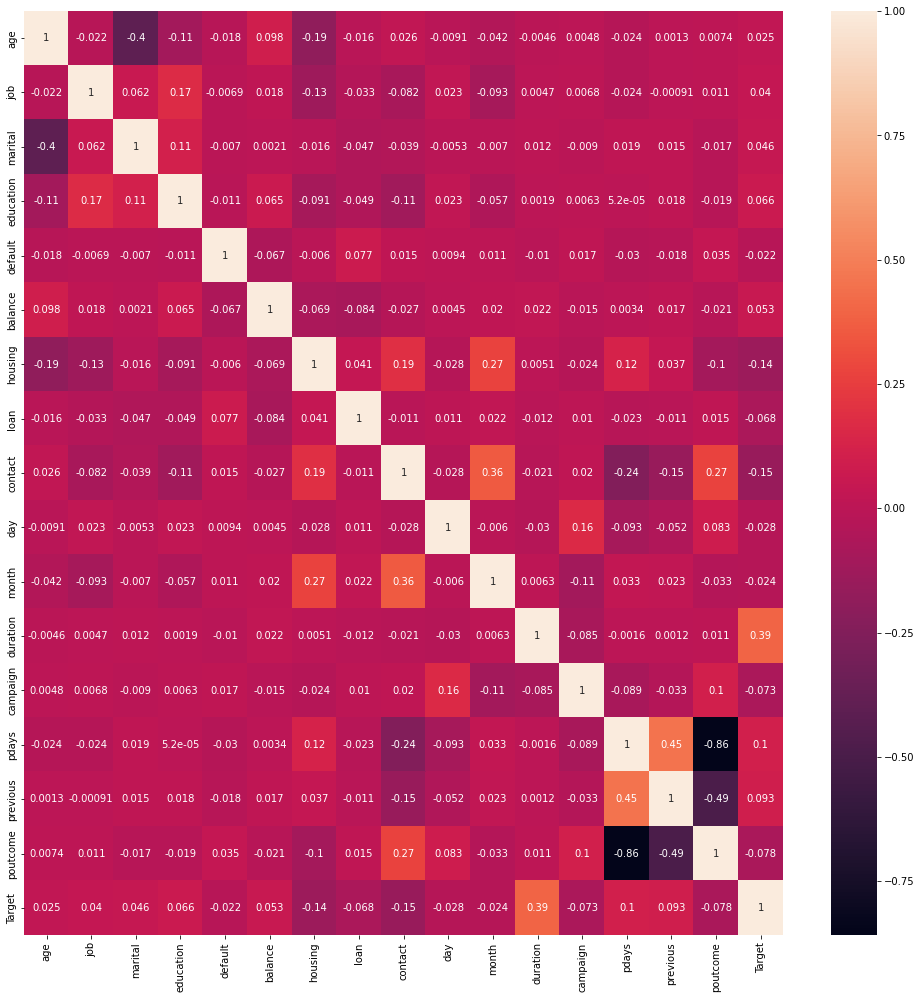

In [35]:
plt.figure(figsize=(17,17))
sns.heatmap(data = df.corr(), annot=True)
plt.show()


  <div dir=rtl id="preprocessing">
    <font face="XB Zar" size=4>
      <font color="red" size=5>آماده سازی دیتاست برای پردازش</font>
      <hr />
      قدم اول برای آماده سازی دیتاست تبدیل مقادیر غیرعددی به مقادیر عددی است که بتوان در مدل ها استفاده کرد. در این مرحله از
      <font face="Roboto">Label Encoder</font>
      استفاده می شود:
    </font>
  </div>

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns_to_encode = ['job', 'marital', 'education', 'month', 'contact', 'poutcome', 'housing', 'loan', 'Target', 'default']
for column_to_encode in columns_to_encode:
    encoder.fit(np.array(df[column_to_encode]))
    df[column_to_encode]=encoder.transform(df[column_to_encode])

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0



  <div dir=rtl id="preprocessing">
    <font face="XB Zar" size=4>
      قدم بعدی حذف سطرهایی است که دردسترس نیست:
    </font>
  </div>

In [8]:
colums_have_unknow=['job', 'marital', 'education', 'default', 'housing', 'loan']
for colum_has_unknow in colums_have_unknow:
    df.drop(df[df[colum_has_unknow] == 'unknow'].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  Target     45211 non-null  int64
dtypes: int64(17)
memory usage: 7.2 MB


  <div dir=rtl id="preprocessing">
    <font face="XB Zar" size=4>
      قدم آخر تقسیم دیتاست به دو قسمت:
      <ul>
        <font face="Roboto">
          <li>
            Training
          </li>
          <li>
            Testing
          </li>
        </font>
      </ul>
      می باشد که دو قسمت اصلی یادگیری ماشین هستند.
    </font>
  </div>

In [9]:
y = df["Target"].copy()
x = df.drop("Target", axis=1)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)


  <div dir="rtl" id="intro">
    <font face="XB Zar" size=4>
      <font color="red" size=5>
        مقدمه ای بر روش های
        <font face="Roboto">Ensemble</font>
      </font>
      <hr />
       فرض کنید که شما از تعدادی از افراد(به صورت تصادفی) خواسته اید که یک مسئله را حل کرده و به شما تحویل دهند، احتمالا با جمع بندی پاسخ افراد به نتیجه بهتری نسبت به حالتی که از یک نفر(به صورت تصادفی) بخواهید تا این سوال را پاسخ دهد خواهید رسید. به این تئوری
       <font face="Roboto">wisdom of the crowd</font>
       گفته میشود. در روش های
       <font face="Roboto">ensemble</font>
       نیز از همین تئوری الهام گرفته و به همین صورت عمل می شود و از ترکیب چند الگوریتم برای بهبود درصد پاسخ استفاده می شود.
       </font>
    </div>


  <div dir=rtl id="voting">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        روش رأی‌ گیری
      </font>
      <br />
      </font>
    </div>

In [12]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
log_clf = LogisticRegression(solver='lbfgs', max_iter=30000)
dt_clf = DecisionTreeClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)])
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=30000)),
                             ('dt', DecisionTreeClassifier()), ('svc', SVC())])

In [14]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, dt_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8906166219839142
DecisionTreeClassifier 0.8750670241286863
SVC 0.8828418230563003
VotingClassifier 0.8918900804289545


In [15]:
# soft voting
log_clf = LogisticRegression(solver='lbfgs', max_iter=30000)
dt_clf = DecisionTreeClassifier()
svm_clf = SVC(probability=True)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', dt_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=30000)),
                             ('rf', DecisionTreeClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [16]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, dt_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8906166219839142
DecisionTreeClassifier 0.8741286863270777
SVC 0.8828418230563003
VotingClassifier 0.8914879356568365



  <div dir=rtl id="bagging">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        روش
        <font face="Roboto">
        Bagging
        </font>
      </font>
      <br />
      </font>
    </div>

In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, max_samples=400, bootstrap=True, n_jobs=-1)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8962466487935656


  <div dir=rtl id="pasting">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        روش
        <font face="Roboto">
          Pasting
        </font>
      </font>
      <br />
      </font>
    </div>

In [18]:
#pasting
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, max_samples=400, bootstrap=False, n_jobs=-1)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8960455764075067


  <div dir=rtl id="out-of-bag">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        ارزیابی
        <font face="Roboto">
          out-of-bag
        </font>
      </font>
      <br />
      </font>
    </div>

In [19]:
#oob
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, max_samples=400, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
bag_clf.oob_score_

0.8976263576639926


  <div dir=rtl id="random-forests">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        روش
        <font face="Roboto">
          Random Forests
        </font>
      </font>
      <br />
      </font>
    </div>


  <div dir=rtl id="extera-trees">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        روش
        <font face="Roboto">
          Extra-Trees
        </font>
      </font>
      <br />
      </font>
    </div>

In [20]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(x_train, y_train)
y_pred_rf = rnd_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8961796246648793


  <div dir=rtl id="boosting">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        روش
        <font face="Roboto">
          Boosting
        </font>
      </font>
      <br />
      </font>
    </div>


  <div dir=rtl id="adaboost">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        الگوریتم
        <font face="Roboto">
          AdaBoost
        </font>
      </font>
      <br />
      </font>
    </div>

In [21]:
#Ada boost(SAMME)

from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME", learning_rate=0.5)
ada_clf.fit(x_train, y_train)
y_pred = ada_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8948391420911528

In [22]:
#Ada boost(SAMME.R)

from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(x_train, y_train)
y_pred = ada_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8989276139410187


  <div dir=rtl id="gradient-boost">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        الگوریتم
        <font face="Roboto">
          Gradient Boost
        </font>
      </font>
      <br />
      </font>
    </div>

In [23]:
# Gradiant boost(manual setup)
from sklearn.tree import DecisionTreeClassifier
tree_cl1 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_cl1.fit(x_train, y_train)

y2 = y_train - tree_cl1.predict(x_train)
tree_cl2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_cl2.fit(x_train, y2)

y3 = y2 - tree_cl2.predict(x_train)
tree_cl3 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_cl3.fit(x_train, y3)

y_pred = sum(tree.predict(x_test) for tree in (tree_cl1, tree_cl2, tree_cl3))
accuracy_score(y_test, y_pred)

0.8880026809651475

In [24]:
# Gradiant boost(use sklearn)
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=2, n_estimators=5, random_state=42, learning_rate=1.0)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
accuracy_score(y_test, y_pred)

0.8939678284182305


  <div dir=rtl id="early-stopping">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        استفاده از
        <font face="Roboto">
          Early stopping
        </font>
      </font>
      <br />
      </font>
    </div>

In [25]:
# Use early stopping so as to find best n_estimators parameter for GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=2, warm_start = True, random_state=42, learning_rate=1.0)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbc.n_estimators = n_estimators
    gbc.fit(x_train, y_train)
    y_pred = gbc.predict(x_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
gbc.n_estimators

15

In [26]:
accuracy_score(y_test, y_pred)

0.9000670241286863


  <div dir=rtl id="xg-boost">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        الگوریتم
        <font face="Roboto">
          XGBoost
        </font>
      </font>
      <br />
      </font>
    </div>

In [27]:
#XGBoost
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from xgboost import XGBClassifier
XG_classifier = XGBClassifier(random_state = 42)
XG_classifier.fit(x_train, y_train)

XGBClassifier(random_state=42)

In [29]:
y_pred = XG_classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.9037533512064343

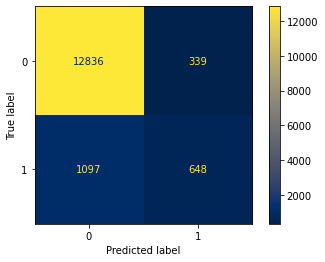

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.cividis)
plt.show()


  <div dir=rtl id="cat-boost">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        الگوریتم
        <font face="Roboto">
          CatBoost
        </font>
      </font>
      <br />
      </font>
    </div>

In [31]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [32]:
from catboost import CatBoostClassifier

cat_features = list(range(0, x.shape[1]))
clf = CatBoostClassifier(iterations=5, learning_rate=0.1)
clf.fit(x_train, y_train, cat_features=cat_features,  verbose=False)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8922922252010724

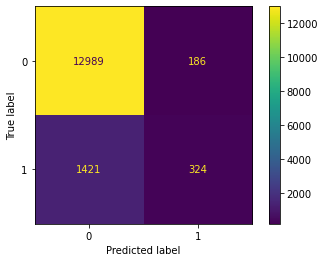

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


  <div dir=rtl id="stacking">
  <font face="XB Zar" size=4>
      <font color="red" size=5>
        روش
        <font face="Roboto">
          Stacking
        </font>
      </font>
      <br />
      </font>
    </div>

In [34]:
#staking
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=10, random_state=42)
svm_clf = SVC(random_state=42)
stacking_clf = StackingClassifier(estimators=[('rf', rf_clf), ('svc', svm_clf)], final_estimator=LogisticRegression())
stacking_clf.fit(x_train, y_train)
y_pred = stacking_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8988605898123324